### Importing Abalone dataset

##### The dataset contains 8 features and 4177 instances

- Features
  - Sex
  - Lenght
  - Diameter
  - Height
  - Whole weight
  - Shucked weight
  - Viscera weight
  - Shell weight
  - Rigns

In [524]:
import pandas as pd
import numpy as np

names = ['Sex', 'Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 
         'Shell Weight', 'Rings']

df = pd.read_csv('abalone.data', names = names)

df.head().T

,0,1,2,3,4
Sex,M,M,F,M,I
Lenght,0.455,0.35,0.53,0.44,0.33
Diameter,0.365,0.265,0.42,0.365,0.255
Height,0.095,0.09,0.135,0.125,0.08
Whole Weight,0.514,0.2255,0.677,0.516,0.205
Shucked Weight,0.2245,0.0995,0.2565,0.2155,0.0895
Viscera Weight,0.101,0.0485,0.1415,0.114,0.0395
Shell Weight,0.15,0.07,0.21,0.155,0.055
Rings,15,7,9,10,7


#### Feature Processing: 

Using Ordinal Encoder, the first feature was numerically encoded

In [525]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

df[['Sex']] = enc.fit_transform(df[['Sex']])

df.head().T


,0,1,2,3,4
Sex,2.0000,2.0000,0.0000,2.0000,1.0000
Lenght,0.4550,0.3500,0.5300,0.4400,0.3300
Diameter,0.3650,0.2650,0.4200,0.3650,0.2550
Height,0.0950,0.0900,0.1350,0.1250,0.0800
Whole Weight,0.5140,0.2255,0.6770,0.5160,0.2050
Shucked Weight,0.2245,0.0995,0.2565,0.2155,0.0895
Viscera Weight,0.1010,0.0485,0.1415,0.1140,0.0395
Shell Weight,0.1500,0.0700,0.2100,0.1550,0.0550
Rings,15.0000,7.0000,9.0000,10.0000,7.0000


#### Feature Processing:
Standard Sclaing was applied as a requirement of the algorithm to recieve scaled data.

In [526]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = ss.fit_transform(df)

names = ['Sex', 'Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 
         'Shell Weight', 'Rings']

df = pd.DataFrame(df, columns = names)

df.head()

,Sex,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,1.151980,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,1.151980,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,-1.280690,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,1.151980,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-0.064355,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


### Model Training using KNN

Model was trained using K Nearest Nighbor algorithm with a k = 3. Features and target columns were split into two training variables and fit to the model.

In [527]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import utils


xcol = [x for x in df.columns if x != 'Rings']

xd = df[xcol]
yd_ = df['Rings'] 

# transforming variable from continuous to multiclass to fit the model
yd = yd_.astype('int')

knn = KNeighborsClassifier(n_neighbors=3, p = 2)

knn = knn.fit(xd,yd)
yp = knn.predict(xd)

print(yp)

[ 0 -1  0 ...  0  0  0]


#### Accuracy calculation:

Calculating accuracy with the real and the predicted labels.

In [528]:
def accuracy (real, pred):
    return sum(yd == yp) / float(real.shape[0])

print(accuracy(yd,yp))

0.8609049557098396


#### Accuracy calculation:

Appling a loop to values of k from 1 to 20 neighbors, is possible to evaulate the change in accuracy and choose the best to fit the model.

In [529]:
scorelist = list()

for k in range (1,21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn = knn.fit(xd,yd)
    
    yp = knn.predict(xd)
    
    score = accuracy(yd, yp)
    scorelist.append((k, score))
scoredf = pd.DataFrame(scorelist, columns = ['k', 'accuracy'])

scoredf.head(10)

,k,accuracy
0,1,1.000000
1,2,0.868566
2,3,0.860905
3,4,0.841992
4,5,0.840555
5,6,0.829064
6,7,0.830022
7,8,0.823558
8,9,0.823797
9,10,0.825233


As is shown in the table above, as soon k = 7 the accuracy does not change a lot, so is an appropiate value of k to be used. 

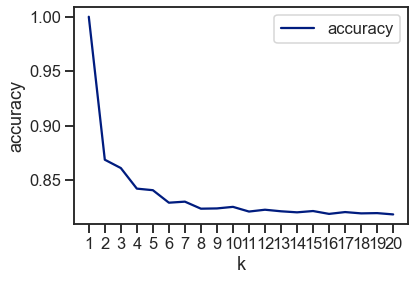

In [530]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = scoredf.set_index('k').plot()

ax.set(xlabel = 'k', ylabel = 'accuracy')

ax.set_xticks(range(1,21))


### Second Model development

In [531]:
names = ['Sex', 'Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 
         'Shell Weight', 'Rings']

df = pd.read_csv('abalone.data', names = names)

df.head().T

,0,1,2,3,4
Sex,M,M,F,M,I
Lenght,0.455,0.35,0.53,0.44,0.33
Diameter,0.365,0.265,0.42,0.365,0.255
Height,0.095,0.09,0.135,0.125,0.08
Whole Weight,0.514,0.2255,0.677,0.516,0.205
Shucked Weight,0.2245,0.0995,0.2565,0.2155,0.0895
Viscera Weight,0.101,0.0485,0.1415,0.114,0.0395
Shell Weight,0.15,0.07,0.21,0.155,0.055
Rings,15,7,9,10,7


##### Feature Processing:

Using ordinal encoder, the first feature was encoded


In [532]:
enc = OrdinalEncoder()

df[['Sex']] = enc.fit_transform(df[['Sex']])

df.head().T

,0,1,2,3,4
Sex,2.0000,2.0000,0.0000,2.0000,1.0000
Lenght,0.4550,0.3500,0.5300,0.4400,0.3300
Diameter,0.3650,0.2650,0.4200,0.3650,0.2550
Height,0.0950,0.0900,0.1350,0.1250,0.0800
Whole Weight,0.5140,0.2255,0.6770,0.5160,0.2050
Shucked Weight,0.2245,0.0995,0.2565,0.2155,0.0895
Viscera Weight,0.1010,0.0485,0.1415,0.1140,0.0395
Shell Weight,0.1500,0.0700,0.2100,0.1550,0.0550
Rings,15.0000,7.0000,9.0000,10.0000,7.0000


#### Feature Processing:

In order to use other algorithm, data should be split between training and testing.

In [533]:
from sklearn.model_selection import ShuffleSplit

feature_cols = [x for x in df.columns if x != 'Rings']
target_col = df['Rings']

ss = ShuffleSplit(n_splits = 1000, test_size = 5, random_state = 42)

for train_idx, test_idx in ss.split(feature_cols):
    print('Train: ', train_idx, 'Test: ', test_idx)


X_train = df.loc[train_idx, feature_cols]
y_train = df.loc[train_idx, 'Rings']

X_test = df.loc[test_idx, feature_cols]
y_test = df.loc[test_idx, 'Rings']


Train:  [4 3 6] Test:  [1 5 0 7 2]
Train:  [2 1 6] Test:  [3 7 0 4 5]
Train:  [5 2 7] Test:  [0 6 3 1 4]
Train:  [4 3 1] Test:  [5 2 7 6 0]
Train:  [0 3 4] Test:  [1 7 6 2 5]
Train:  [6 3 1] Test:  [0 7 4 5 2]
Train:  [2 0 7] Test:  [1 6 3 5 4]
Train:  [1 6 0] Test:  [4 2 5 7 3]
Train:  [7 0 1] Test:  [6 3 2 5 4]
Train:  [4 3 6] Test:  [5 7 0 1 2]
Train:  [7 3 1] Test:  [2 0 4 6 5]
Train:  [7 1 6] Test:  [0 2 4 5 3]
Train:  [6 5 3] Test:  [4 2 1 0 7]
Train:  [1 7 4] Test:  [2 0 5 3 6]
Train:  [6 7 3] Test:  [1 2 5 0 4]
Train:  [6 0 4] Test:  [2 1 7 3 5]
Train:  [2 6 7] Test:  [1 3 4 0 5]
Train:  [4 2 0] Test:  [3 7 5 6 1]
Train:  [0 6 3] Test:  [2 4 5 1 7]
Train:  [5 7 6] Test:  [3 0 1 2 4]
Train:  [7 0 2] Test:  [3 6 1 5 4]
Train:  [1 4 0] Test:  [5 3 6 7 2]
Train:  [3 7 1] Test:  [0 6 5 2 4]
Train:  [3 0 6] Test:  [2 7 1 5 4]
Train:  [4 7 6] Test:  [5 1 3 0 2]
Train:  [7 2 6] Test:  [5 0 4 1 3]
Train:  [4 0 5] Test:  [6 2 1 7 3]
Train:  [3 1 2] Test:  [5 4 6 7 0]
Train:  [2 7 0] Test

Train:  [3 4 0] Test:  [1 6 5 7 2]
Train:  [7 0 2] Test:  [5 6 4 3 1]
Train:  [7 4 2] Test:  [3 6 5 1 0]
Train:  [6 1 0] Test:  [5 3 2 7 4]
Train:  [1 6 7] Test:  [5 3 2 0 4]
Train:  [3 0 4] Test:  [1 5 7 6 2]
Train:  [4 0 5] Test:  [6 1 7 2 3]
Train:  [0 1 4] Test:  [5 3 2 6 7]
Train:  [2 0 7] Test:  [5 6 4 3 1]
Train:  [7 0 3] Test:  [2 5 1 4 6]
Train:  [1 3 4] Test:  [2 6 5 7 0]
Train:  [0 7 5] Test:  [1 4 2 6 3]
Train:  [0 1 4] Test:  [5 7 2 6 3]
Train:  [6 3 5] Test:  [0 2 1 7 4]
Train:  [4 3 0] Test:  [1 7 5 2 6]
Train:  [5 7 0] Test:  [4 3 2 6 1]
Train:  [4 5 1] Test:  [0 2 3 7 6]
Train:  [5 3 0] Test:  [4 6 7 2 1]
Train:  [0 5 6] Test:  [4 2 7 1 3]
Train:  [1 3 0] Test:  [2 7 4 5 6]
Train:  [7 6 3] Test:  [4 2 1 5 0]
Train:  [4 5 2] Test:  [0 6 3 7 1]
Train:  [4 1 0] Test:  [6 2 3 7 5]
Train:  [3 6 1] Test:  [5 4 2 7 0]
Train:  [7 4 3] Test:  [5 1 6 0 2]
Train:  [7 6 0] Test:  [5 3 2 1 4]
Train:  [4 2 7] Test:  [3 6 1 5 0]
Train:  [7 4 3] Test:  [0 2 6 1 5]
Train:  [4 6 0] Test

#### Model Developmentt:
In order to fix this problem, another regression algorithm was chosen, Linear Regression, and we can see how the data does not follow a lineat pattern and despite giving good MAE and MSE, R2 score was negative

In [566]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))


-0.9179281919225819
4.43486365743915
5.181794543101468


#### Graphs and metrics:
As we graph all the features comparing them indivudually to the ring count, we see that the model fits poorly in the data

['Sex', 'Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']


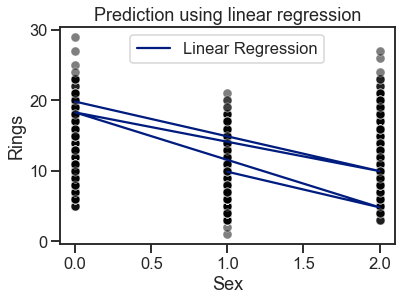

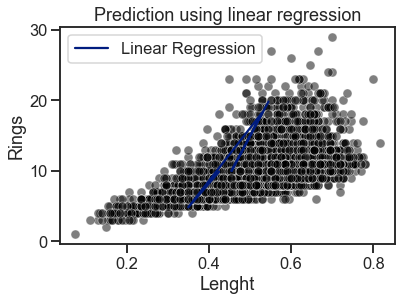

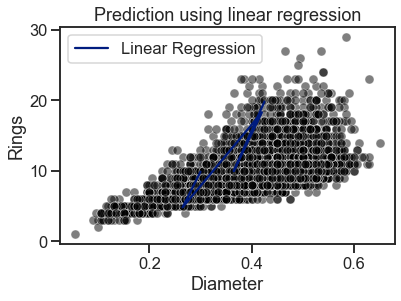

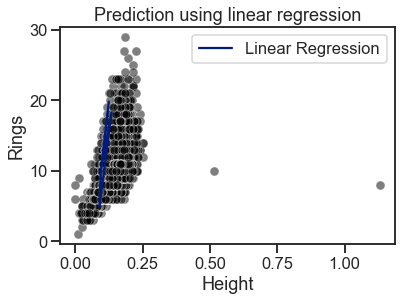

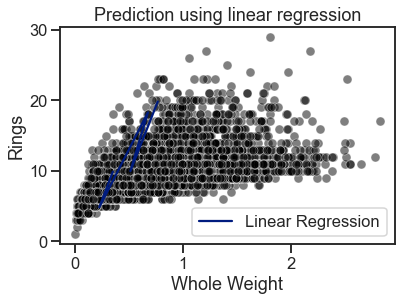

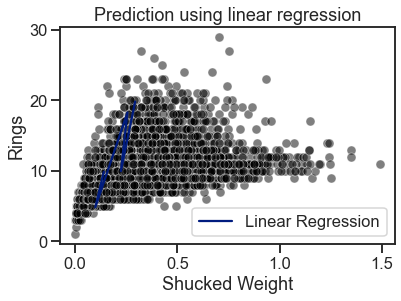

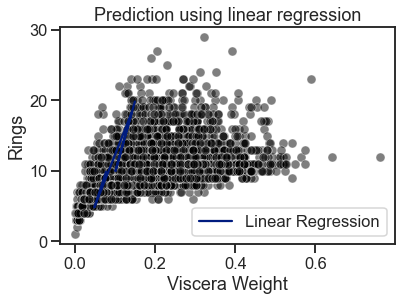

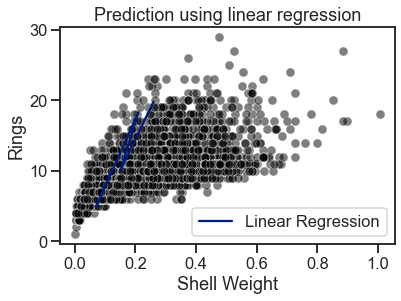

In [567]:
import seaborn as sns
%matplotlib inline

feature_name = [x for x in df.columns if x != 'Rings']

print(feature_name)

for i in range (len(feature_name)):
    sns.scatterplot(data=df, x=feature_name[i], y='Rings',
                    color="black", alpha=0.5)
    plt.plot(X_test[feature_name[i]], y_pred, label="Linear Regression")
    plt.legend()
    _ = plt.title("Prediction using linear regression")
    plt.show()

#### Graphs and metrics:
In the paiplot below, we can see the relationship between all features, and the relationship taken from the graph is as the abalone increase its features values, the ring count does not change linearly as we see outliers containing a high ring count despite its low feature values.

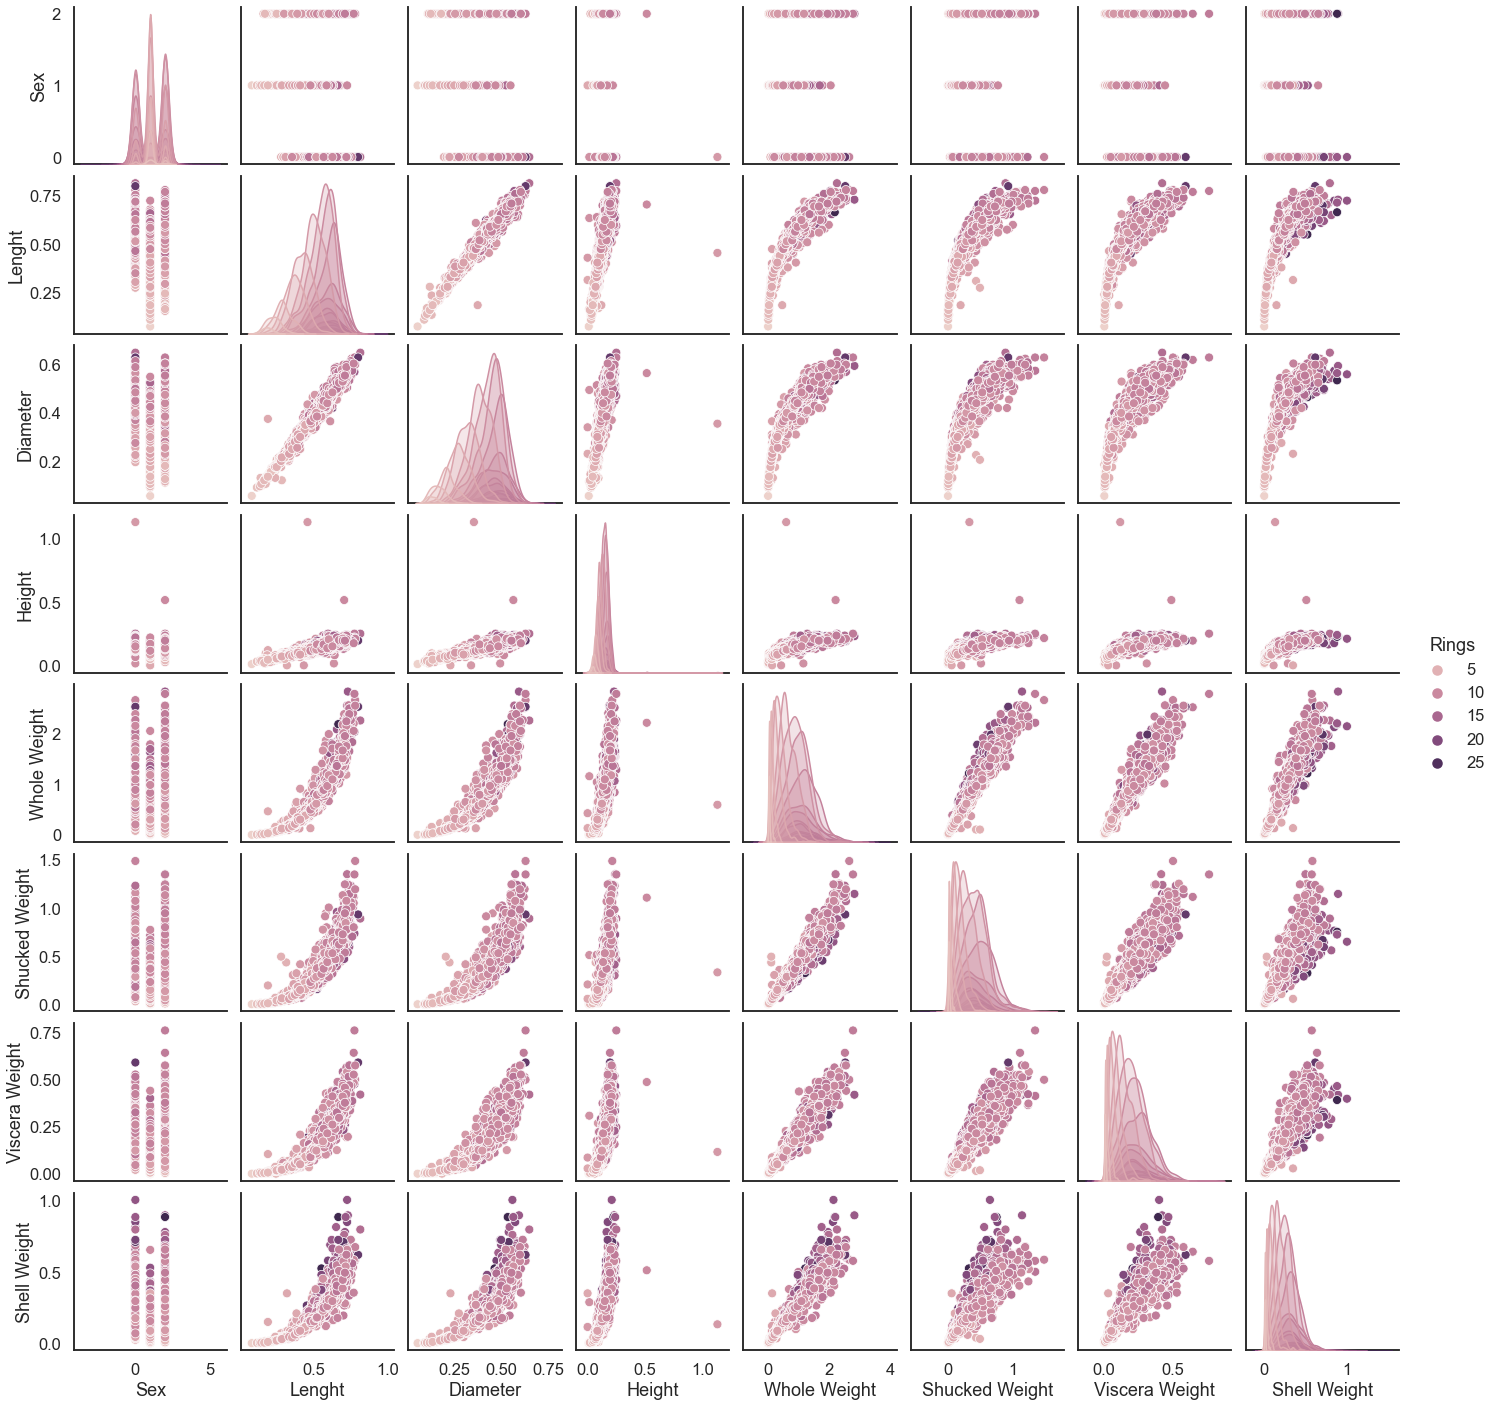

In [568]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

sns.pairplot(df, hue = 'Rings')

#### Graphs and metrics:
In the heatmap below, we see that there is no strong relationship between any feature and the ring count, the highest value for correlation was shell weight with 63%

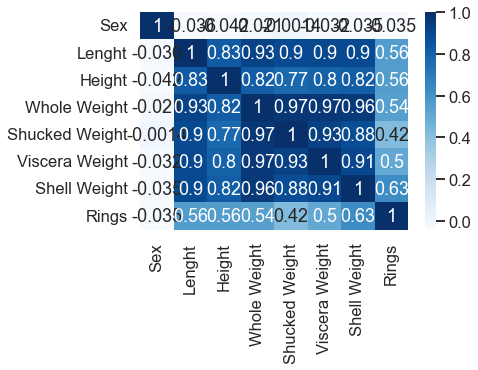

In [569]:
sns.heatmap(df[['Sex', 'Lenght', 'Height', 'Whole Weight','Shucked Weight', 'Viscera Weight', 'Shell Weight' ,'Rings']].corr(), cmap='Blues', annot=True)
plt.show()